In [102]:
!pip install pandas numpy seaborn matplotlib scikit-learn

In [103]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt


In [109]:
qqq = pd.read_csv('/Users/jongmyng/Desktop/bda2/QQQ(2004:01:02~2024:06:20) 복사본.csv')
cpi= pd.read_csv('/Users/jongmyng/Desktop/bda2/소비자물가지수(04:01~24:05).csv',
                 encoding='cp949')

# 전처리
##  qqq

In [110]:
import datetime as dt
qqq['날짜'] = pd.to_datetime(qqq['날짜'])
qqq['연월'] = qqq['날짜'].dt.strftime('%Y-%m')

qqq['연도'] = qqq['날짜'].dt.year
qqq['월'] = qqq['날짜'].dt.month
qqq['일'] = qqq['날짜'].dt.day
qqq['요일']= qqq['날짜'].dt.weekday
qqq['요일'] = qqq['요일'].replace({0:'월',1:'화',2:'수',3:'목',4:'금'})
qqq = qqq.sort_values(by='날짜', ascending=True)



In [111]:
qqq.reset_index(drop=True, inplace=True)

In [112]:
qqq

,날짜,종가,시가,고가,저가,거래량,변동 %,연월,연도,월,일,요일
0,2004-01-02,36.21,36.51,36.64,36.07,55.26M,-0.28%,2004-01,2004,1,2,금
1,2004-01-05,36.94,36.43,37.00,36.41,69.76M,2.02%,2004-01,2004,1,5,월
2,2004-01-06,37.19,36.93,37.27,36.80,60.08M,0.68%,2004-01,2004,1,6,화
3,2004-01-07,37.52,37.13,37.52,36.92,71.90M,0.89%,2004-01,2004,1,7,수
4,2004-01-08,37.82,37.69,37.84,37.44,78.27M,0.80%,2004-01,2004,1,8,목
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-06-13,476.72,477.72,478.39,474.42,25.86M,0.54%,2024-06,2024,6,13,목
4996,2024-06-14,479.19,476.52,479.26,476.05,23.37M,0.52%,2024-06,2024,6,14,금
4997,2024-06-17,485.06,479.46,486.86,478.14,37.05M,1.22%,2024-06,2024,6,17,월
4998,2024-06-18,485.21,485.01,485.90,483.43,24.44M,0.03%,2024-06,2024,6,18,화


Text(0.5, 1.0, '날짜별 종가')

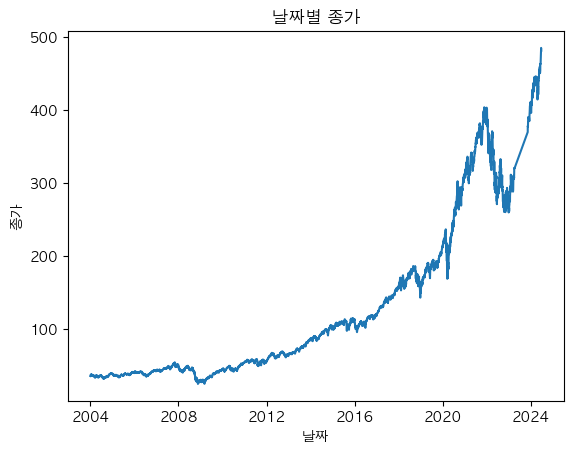

In [113]:
sns.lineplot(x='날짜', y='종가', data=qqq)
plt.title('날짜별 종가')

## cpi

In [114]:
cpi.columns

Index(['시점', '전국', '전국.1'], dtype='object')

In [115]:
cpi.rename(columns={'전국' : 'cpi',
                    '전국.1' : '전월대비증감률'}, inplace=True)
cpi.drop(0,axis=0, inplace=True)


In [116]:
cpi['시점'] = pd.to_datetime(cpi['시점'])
cpi.reset_index(inplace=True, drop=True)

/var/folders/fz/nl6s3pmj3tj57mpffc5d1h080000gn/T/ipykernel_57793/3846049616.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cpi['시점'] = pd.to_datetime(cpi['시점'])


In [120]:
cpi['연월'] = cpi['시점'].dt.strftime('%Y-%m')

cpi.head()

,시점,cpi,전월대비증감률,연월
0,2004-01-01,71.172,0.6,2004-01
1,2004-02-01,71.487,0.4,2004-02
2,2004-03-01,72.181,1.0,2004-03
3,2004-04-01,72.181,0.0,2004-04
4,2004-05-01,72.119,-0.1,2004-05


In [127]:
cpi['cpi'] =cpi['cpi'].astype(float)

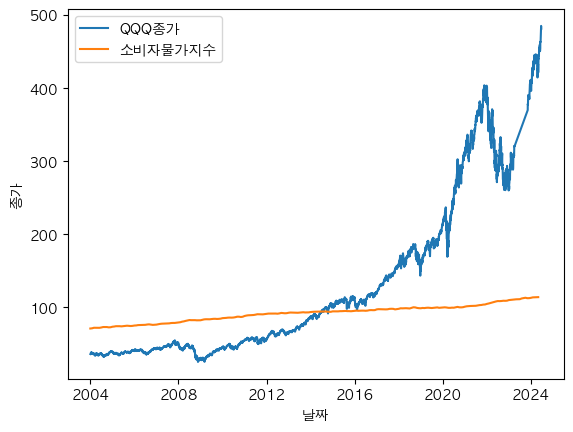

In [131]:
sns.lineplot(data=qqq,
             x='날짜',
             y='종가',
             label='QQQ종가')
sns.lineplot(data=cpi,
            x='시점',
            y='cpi',
            label='소비자물가지수')
plt.legend()


<Axes: xlabel='시점', ylabel='cpi'>

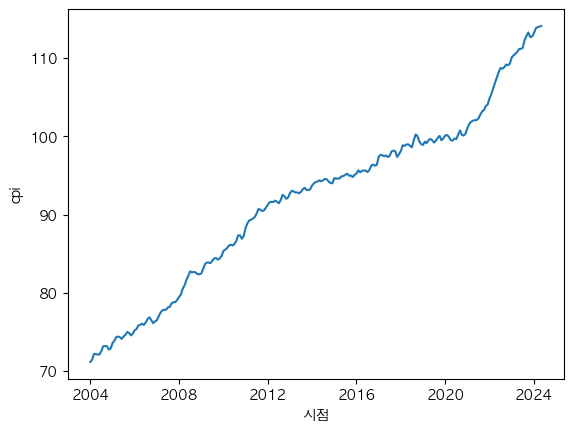

In [139]:
sns.lineplot(x='시점',
             y='cpi',
             data=cpi)

In [141]:
# 주가 수익률과 Cpi통해서 실질수익률 그래프를 그리기 
cpi

,시점,cpi,전월대비증감률,연월
0,2004-01-01,71.172,0.6,2004-01
1,2004-02-01,71.487,0.4,2004-02
2,2004-03-01,72.181,1.0,2004-03
3,2004-04-01,72.181,0.0,2004-04
4,2004-05-01,72.119,-0.1,2004-05
...,...,...,...,...
240,2024-01-01,113.150,0.4,2024-01
241,2024-02-01,113.770,0.5,2024-02
242,2024-03-01,113.940,0.1,2024-03
243,2024-04-01,113.990,0.0,2024-04


시점         datetime64[ns]
cpi               float64
전월대비증감률            object
연월                 object
dtype: object